#Without Scaling

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

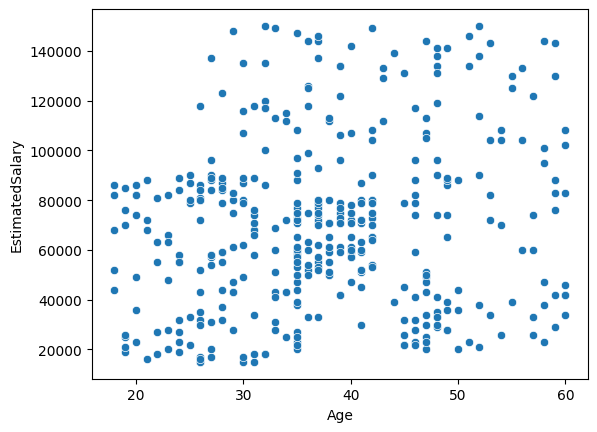

In [6]:
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1])

In [7]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [10]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2)) #128 * 2+ 128
model.add(Dense(1,activation='sigmoid')) #128 * 1 + 1

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 2s 63ms/step - loss: 410.4523 - accuracy: 0.5281 - val_loss: 283.6456 - val_accuracy: 0.4000
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 164.6673 - accuracy: 0.5406 - val_loss: 114.9237 - val_accuracy: 0.4000
Epoch 3/100
10/10 [==============================] - 0s 14ms/step - loss: 76.0383 - accuracy: 0.4938 - val_loss: 117.3337 - val_accuracy: 0.6000
Epoch 4/100
10/10 [==============================] - 0s 16ms/step - loss: 108.6105 - accuracy: 0.6031 - val_loss: 39.3320 - val_accuracy: 0.6000
Epoch 5/100
10/10 [==============================] - 0s 14ms/step - loss: 35.4677 - accuracy: 0.4969 - val_loss: 2.4306 - val_accuracy: 0.4125
Epoch 6/100
10/10 [==============================] - 0s 13ms/step - loss: 21.4399 - accuracy: 0.5188 - val_loss: 31.6576 - val_accuracy: 0.6000
Epoch 7/100
10/10 [==============================] - 0s 14ms/step - loss: 84.5481 - accuracy: 0.5531 - val_loss: 9.8529 - val_accur

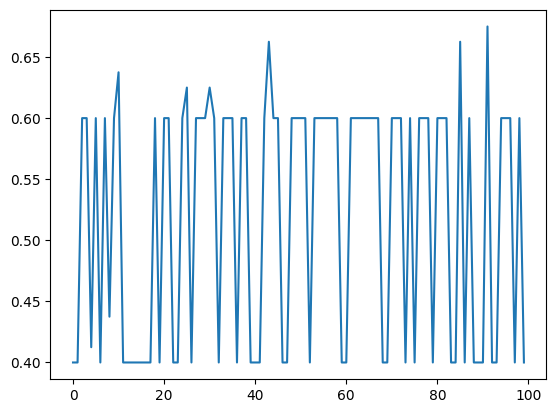

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

#Apply Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: >

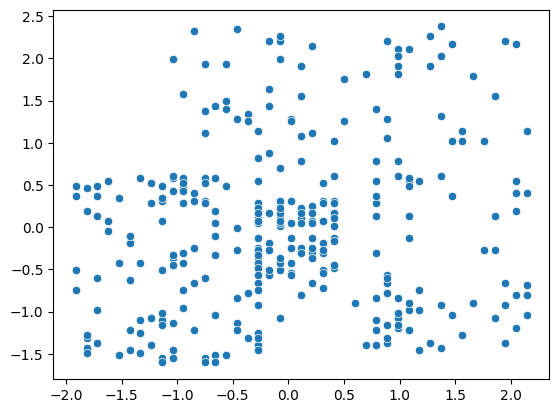

In [18]:
sns.scatterplot(x=X_train_scaled[:,0],y=X_train_scaled[:,1])

In [19]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 36ms/step - loss: 0.6631 - accuracy: 0.6687 - val_loss: 0.6202 - val_accuracy: 0.8625
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 0.6101 - accuracy: 0.8344 - val_loss: 0.5697 - val_accuracy: 0.8875
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5668 - accuracy: 0.8500 - val_loss: 0.5274 - val_accuracy: 0.8250
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5294 - accuracy: 0.8687 - val_loss: 0.4892 - val_accuracy: 0.8125
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4947 - accuracy: 0.8594 - val_loss: 0.4575 - val_accuracy: 0.8125
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4642 - accuracy: 0.8562 - val_loss: 0.4303 - val_accuracy: 0.8125
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4370 - accuracy: 0.8594 - val_loss: 0.4069 - val_accuracy: 0.8125
Epoch 8/100

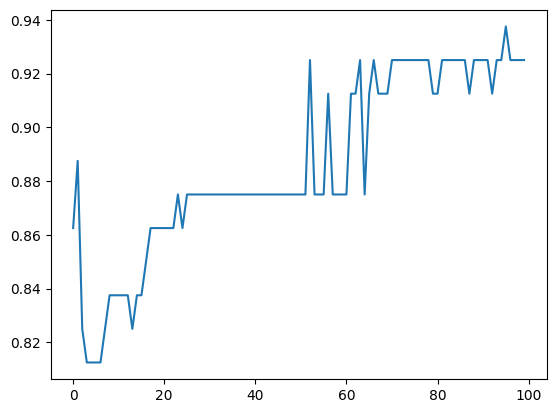

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])